In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import torch

import ResNet as net

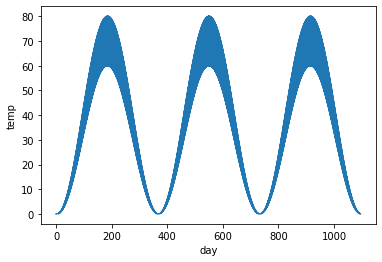

In [2]:
#toy problem in time
n_years = 3
day = np.arange(365*n_years)
hour = np.arange(24)
n_hour = len(hour)
n_trials = 10

temp = np.zeros((n_trials, len(day) * n_hour, 2))

for n in (range(n_trials)):
    for i in range(len(day)):
        
        for j in range(n_hour):
            temp[n, i*n_hour + j, 1] = (10*np.cos(np.pi/12*(hour[j]+12))+70) * (0.5*np.cos(2*np.pi / 365*(day[i]+180)) + 0.5)
            temp[n, i*n_hour + j, 0] = day[i] + hour[j]/ n_hour
        
x1 = 10*np.cos(np.pi/12*(hour+12))+70
x2 = 0.5*np.cos(2*np.pi / 365*(day+180)) + 0.5

# noise = np.random.normal(0,1, temp.shape)
# temp[:,:, 1] += noise[:,:,1]


plt.plot(temp[0, :,0], temp[0, :,1])
plt.xlabel("day")
plt.ylabel("temp")
plt.show()


(10, 26280, 2)


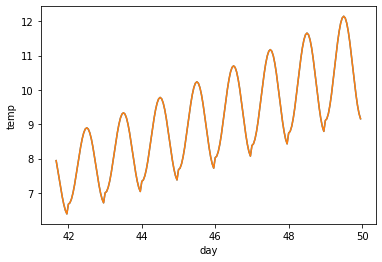

In [3]:
print(temp.shape)
plt.plot(temp[0, 1000:1200,0], temp[0, 1000:1200,1])
plt.plot(temp[1, 1000:1200,0], temp[1,1000:1200,1])
plt.xlabel("day")
plt.ylabel("temp")
plt.show()

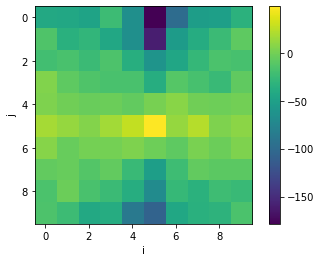

In [4]:
#toy problem in space

x1 = np.random.normal(40, 10, (10,10))

for i in range(10):
    for j in range(10):
        x1[i,j] = abs(x1[i,j]) * (-abs(i-5)+1)/(abs(j-5)+1) + np.random.normal(0,5)

# print(x1)
plt.imshow(x1) 
plt.xlabel("i")
plt.ylabel("j")
# plt.legend()
plt.colorbar()

RuntimeError: Requested MovieWriter (ffmpeg) not available

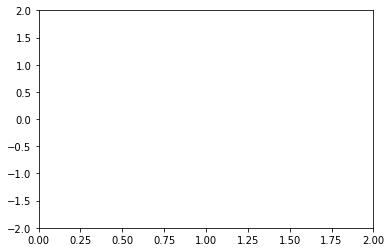

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())